## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
import tensorflow
import glob
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pickle
from tensorflow.keras.applications.resnet50 import ResNet50
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn import metrics
import seaborn as sns

/home/workspace/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
2022-12-20 05:28:22.620836: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-20 05:28:24.656137: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-20 05:28:24.754704: W

## Load the Dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('./TESS_Dataset/TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

2800

In [5]:
paths[:5]

['./TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_thin_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_deep_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_pole_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_lid_angry.wav',
 './TESS_Dataset/TESS Toronto emotional speech set data/OAF_angry/OAF_match_angry.wav']

In [6]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

## Create a DataFrame

In [7]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,./TESS_Dataset/TESS Toronto emotional speech s...,angry
1,./TESS_Dataset/TESS Toronto emotional speech s...,angry
2,./TESS_Dataset/TESS Toronto emotional speech s...,angry
3,./TESS_Dataset/TESS Toronto emotional speech s...,angry
4,./TESS_Dataset/TESS Toronto emotional speech s...,angry


In [8]:
df['label'].value_counts()

angry      400
sad        400
fear       400
disgust    400
neutral    400
happy      400
ps         400
Name: label, dtype: int64

## Exploratory Data Analysis

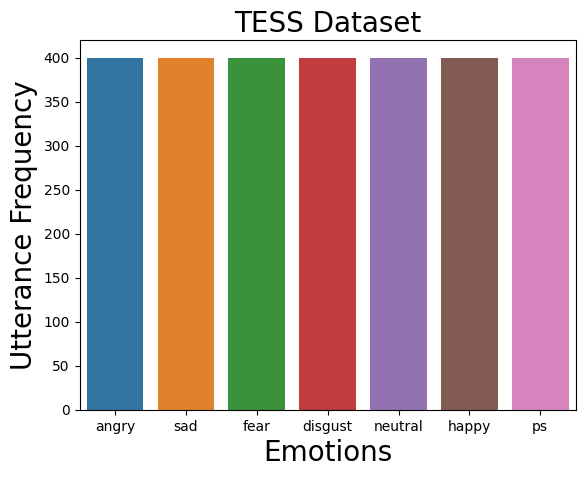

In [17]:
ax = sns.countplot(x="label",data=df)
ax.set_xlabel("Emotions",fontsize=20)
ax.set_ylabel("Utterance Frequency",fontsize=20)
ax.axes.set_title("TESS Dataset",fontsize=20)
plt.savefig('emotion_count')
plt.show()

In [112]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(6,4))
    librosa.display.waveshow(data,sr=sr)
    plt.xlabel("Time",fontsize=12,fontweight='bold')
#     plt.title(emotion,fontsize=12,fontweight='bold')
    plt.title("Pleasant Surprise",fontsize=12,fontweight='bold')
    plt.savefig("Waveplot_Pleasant_Surprise")
    plt.show()
    
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(6,4))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.xlabel("Time",fontsize=12,fontweight='bold')
    plt.ylabel("Hz",fontsize=12,fontweight='bold')
#     plt.title(emotion,fontsize=12,fontweight='bold')
    plt.title("Pleasant Surprise",fontsize=12,fontweight='bold')
    plt.savefig("Spectrogram_Pleasant_Surprise")
    plt.colorbar()
    
def draw_spectrogram_and_waveplot_side_by_side(data,sr,emotion):
    
    plt.subplots(1,2,figsize=(4,3))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(data,sr=sr)
    plt.xlabel("Time",fontsize=12,fontweight='bold')
    plt.ylabel("Hz",fontsize=12,fontweight='bold')
    plt.title("Waveplot",fontsize=12,fontweight='bold')
    
    plt.subplot(1, 2, 2)
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.xlabel("Time",fontsize=12,fontweight='bold')
    plt.ylabel("Hz",fontsize=12,fontweight='bold')
    plt.title("Spectrogram",fontsize=12,fontweight='bold')
    if emotion=="ps":
        emotion = "Pleasant Surprise"
    else:
        list1 = list(emotion)
        list1[0] = list1[0].upper()
        emotion = ''.join(list1)
    plt.suptitle(emotion,fontsize=12,fontweight='bold')

    plt.tight_layout()
    plt.savefig(emotion)
    plt.show()

In [101]:
font = {'family' : '',
        'weight' : 'bold',
        'size'   : 8.5}

plt.rc('font', **font)

In [102]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
path

'./TESS_Dataset/TESS Toronto emotional speech set data/YAF_fear/YAF_white_fear.wav'

In [103]:
data,sampling_rate = librosa.load(path)

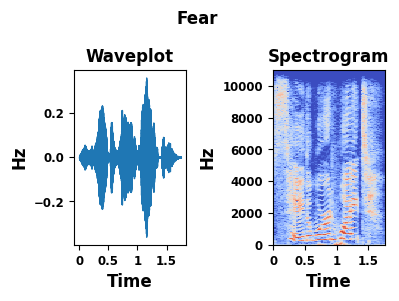

In [104]:
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

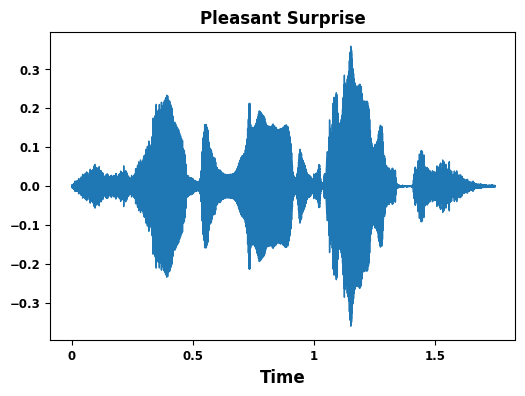

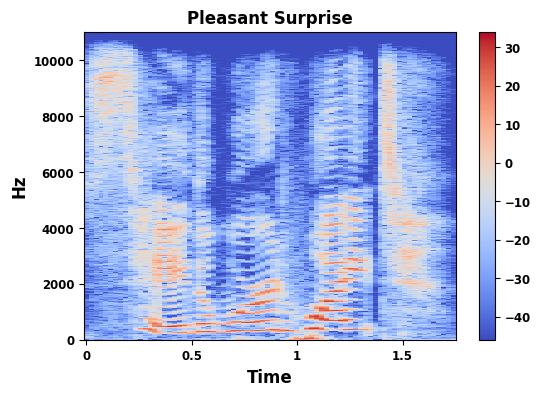

In [28]:
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

In [105]:
Audio(data,rate=sampling_rate)

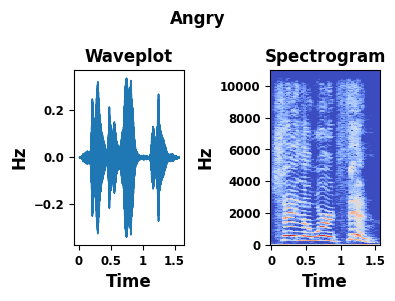

In [106]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

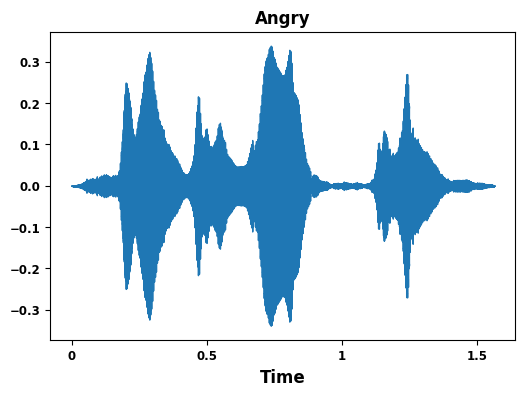

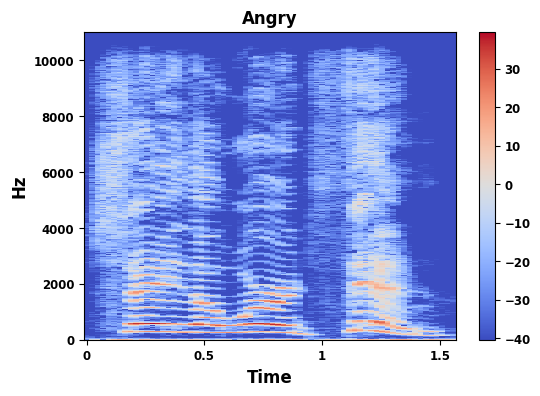

In [155]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

In [156]:
Audio(data,rate=sampling_rate)

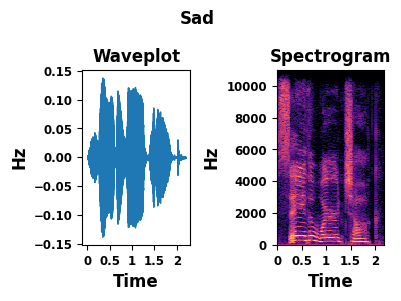

In [107]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

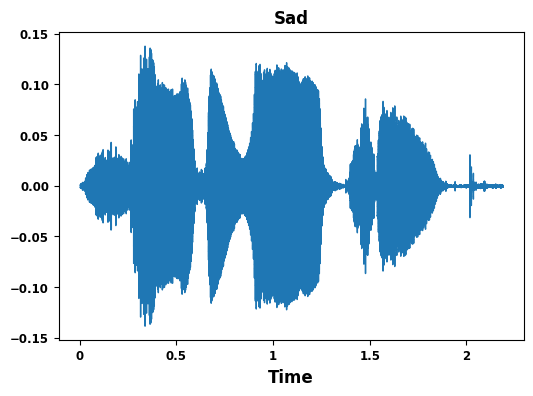

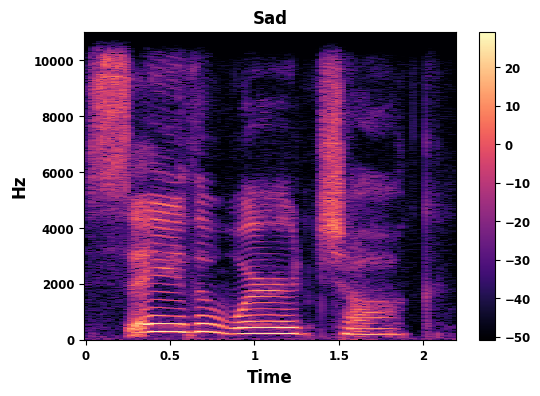

In [158]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

In [159]:
Audio(data,rate=sampling_rate)

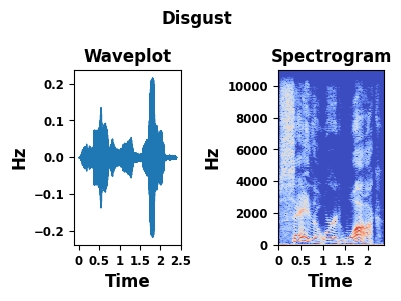

In [108]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

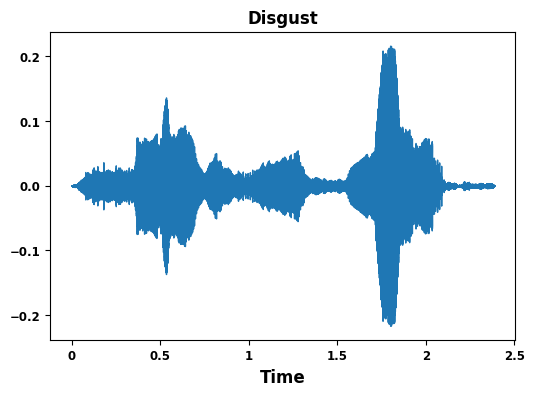

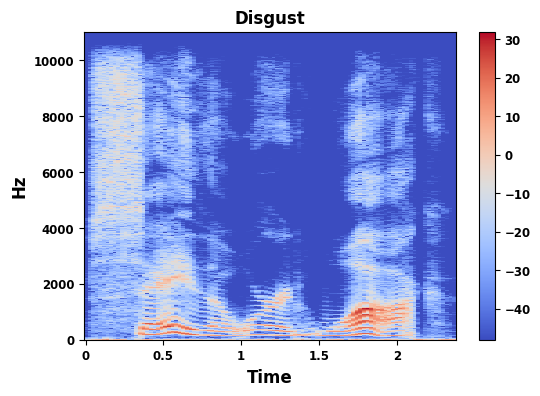

In [161]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

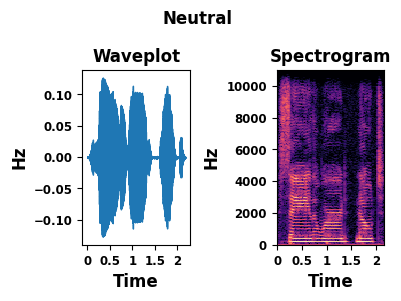

In [109]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

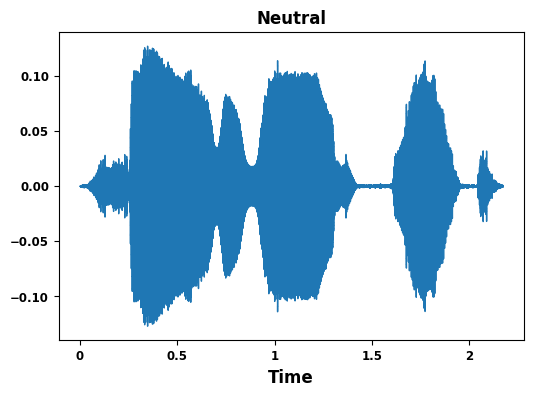

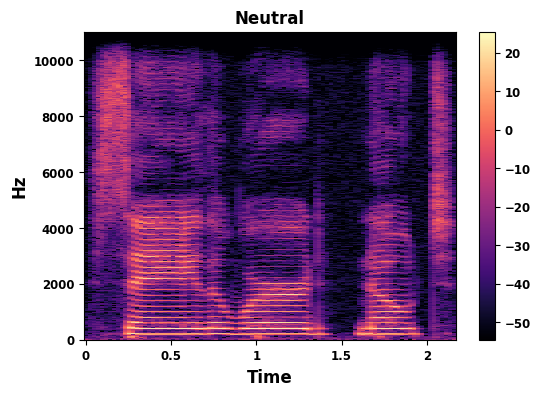

In [163]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

In [164]:
Audio(data,rate=sampling_rate)

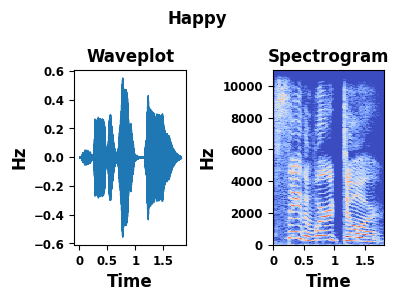

In [110]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

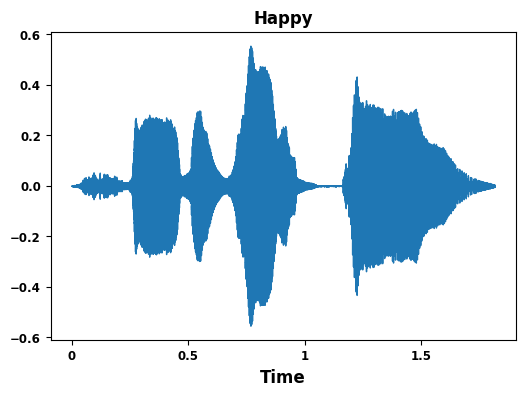

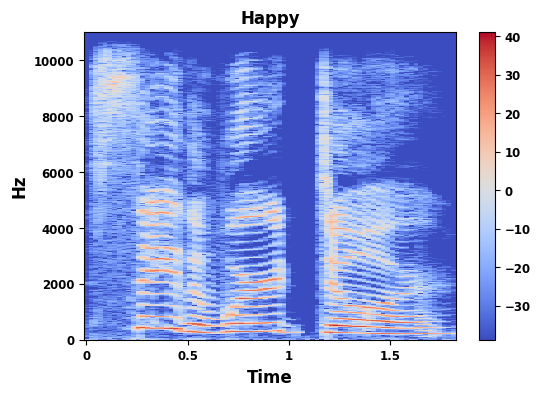

In [166]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

In [167]:
Audio(data,rate=sampling_rate)

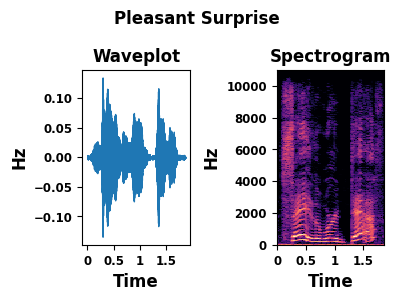

In [113]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
draw_spectrogram_and_waveplot_side_by_side(data,sampling_rate,emotion)

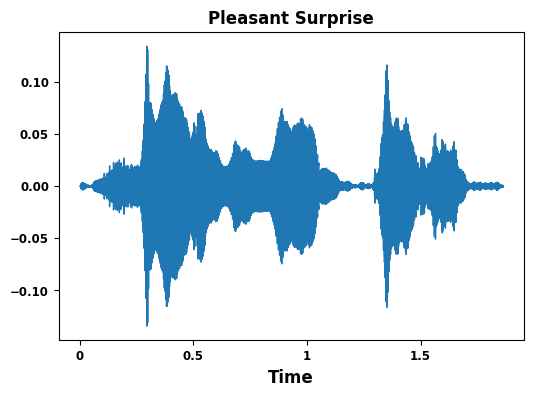

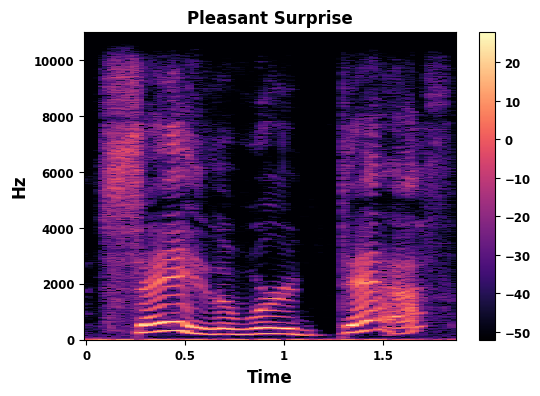

In [169]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)

In [170]:
Audio(data,rate=sampling_rate)

## Feature Extraction

In [38]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

In [25]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-264.0869, 73.48415, 9.453354, 23.8412, -7.42...
1       [-338.3182, 24.769884, -1.1846615, 17.655695, ...
2       [-320.99515, 35.436874, -8.700263, 20.537775, ...
3       [-300.99213, 10.751722, 0.7955878, 12.148019, ...
4       [-325.3291, 36.062252, -20.764576, 22.899342, ...
                              ...                        
2795    [-369.88208, 36.121346, -2.8735213, 5.8755426,...
2796    [-318.86932, 19.357752, -7.1931396, -2.434734,...
2797    [-356.30475, 51.296715, -11.751734, 1.1208414,...
2798    [-355.89838, 63.16139, -8.883628, -5.592215, -...
2799    [-390.41983, 33.18839, 2.0635593, -1.3005589, ...
Name: speech, Length: 2800, dtype: object

In [26]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = X.reshape(2800,40,1)

In [31]:
X.shape

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y = enc.fit_transform(df[['label']])

In [29]:
Y = Y.toarray()

(2800, 7)

In [33]:
Y.shape

(2800, 7)

## Save the Data

In [31]:
np.save('mfcc_X.npy', X) # save
np.save('mfcc_Y.npy',Y) # save

In [15]:
features_X = np.load('mfcc_X.npy') # load
outputs_Y = np.load('mfcc_Y.npy') #load
X = features_X
Y = outputs_Y

### Split data in train,test and validation sets

In [16]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,random_state=1,shuffle=True,test_size=0.2)

In [17]:
X_Train,X_Validation,Y_Train,Y_Validation = train_test_split(X_Train,Y_Train,random_state=2,shuffle=True,test_size=0.125)

In [18]:
print(X_Train.shape,Y_Train.shape)
print(X_Test.shape,Y_Test.shape)
print(X_Validation.shape,Y_Validation.shape)

(1960, 40, 1) (1960, 7)
(560, 40, 1) (560, 7)
(280, 40, 1) (280, 7)


### RNN + BiLSTM Model

In [20]:
model = Sequential()
model.add(SimpleRNN(32,input_shape=(40,1)))
model.add(Reshape((32, 1), input_shape=(32,)))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dense(32,activation='relu'))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 32)                1088      
                                                                 
 reshape_1 (Reshape)         (None, 32, 1)             0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              33792     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 7)                 231       
                                                                 
Total params: 39,239
Trainable params: 39,239
Non-trainable params: 0
__________________________________________________

In [ ]:
## Train the model
best_model = ModelCheckpoint('./best_model_mfcc_rnn_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True,)
history = model.fit(X_Train,Y_Train,validation_data=(X_Validation,Y_Validation),epochs=200,batch_size=512,shuffle=True,callbacks=[best_model])

In [21]:
!touch saved_hist_mfcc_rnn_lstm.pkl

In [22]:
with open('saved_hist_mfcc_rnn_lstm.pkl','wb') as f:
    pickle.dump(history.history,f)

In [22]:
with open('saved_hist_mfcc_rnn_lstm.pkl','rb') as f:
    history = pickle.load(f)

In [19]:
font = {'family' : '',
        'weight' : 'bold',
        'size'   : 8.5}

plt.rc('font', **font)

## Plot the results

In [24]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

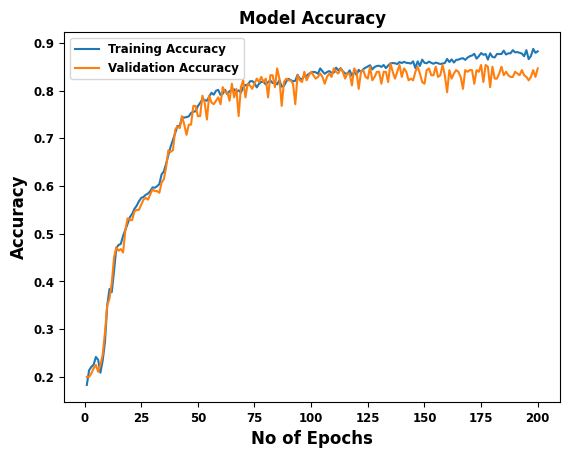

In [14]:
epochs = np.arange(1,201,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('RNN_BiLSTM_Model_Accuracy')
plt.show()

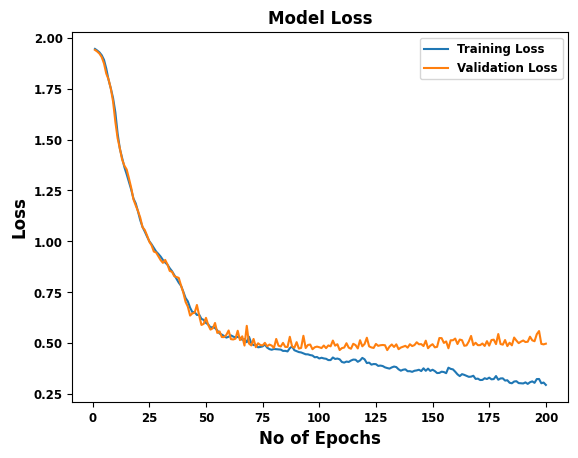

In [15]:
epochs = np.arange(1,201,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('RNN_BiLSTM_Model_Loss')
plt.show()

In [13]:
model.load_weights('best_model_mfcc_rnn_lstm.h5')

In [14]:
model.evaluate(X_Test,Y_Test)

18/18 [==============================] - 1s 5ms/step - loss: 0.4800 - accuracy: 0.8196


[0.4799695611000061, 0.8196428418159485]

### Confusion Matrix

In [15]:
predict_x = model.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 1s 5ms/step


In [16]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[61  0  1  8  0 15  2]
 [ 0 76  1  0  0 11  1]
 [ 0  0 73  2  0  0  0]
 [ 5  1  0 66  0  1  5]
 [ 0  1  0  0 65  1  0]
 [10  9  0  0  0 47 12]
 [ 0  2  0  1  1 11 71]]


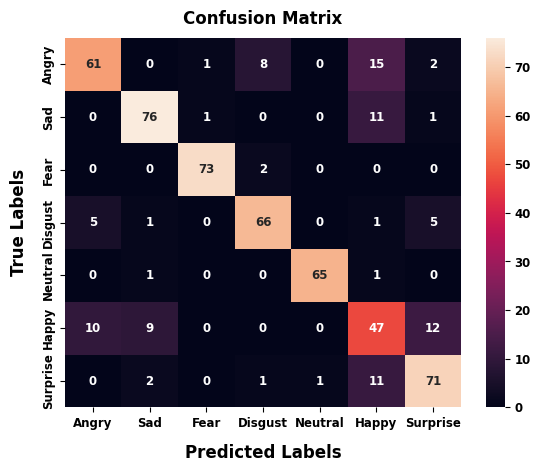

In [20]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('RNN_BiLSTM_Confusion_Matrix')

### Classification Report

In [17]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75        87
           1       0.85      0.85      0.85        89
           2       0.97      0.97      0.97        75
           3       0.86      0.85      0.85        78
           4       0.98      0.97      0.98        67
           5       0.55      0.60      0.57        78
           6       0.78      0.83      0.80        86

    accuracy                           0.82       560
   macro avg       0.83      0.82      0.83       560
weighted avg       0.82      0.82      0.82       560



### Sensitivity and Specificity

In [18]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [19]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [20]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [21]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.70114943 0.85393258 0.97333333 0.84615385 0.97014925 0.6025641
 0.8255814 ]
Specificity =  [0.96828753 0.97239915 0.99587629 0.97717842 0.9979716  0.91908714
 0.95780591]
accuracy for each class =  [0.92678571 0.95357143 0.99285714 0.95892857 0.99464286 0.875
 0.9375    ]


### ROC Curve

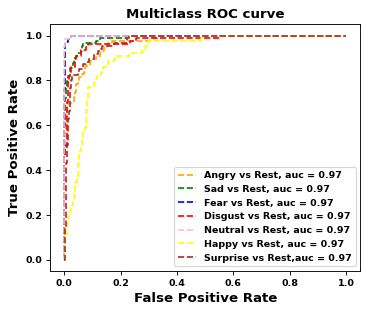

In [22]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')

plt.figure(figsize=(5, 4),dpi=80)    

# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('RNN_BiLSTM_Multiclass_ROC',dpi=80);    

### DNN+BiLSTM

In [26]:
model = Sequential()
model.add(Dense(256,activation='relu',input_shape=(40,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dense(16,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [27]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40, 256)           512       
                                                                 
 dense_5 (Dense)             (None, 40, 128)           32896     
                                                                 
 dense_6 (Dense)             (None, 40, 64)            8256      
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 16)                2064      
                                                                 
 dense_8 (Dense)             (None, 7)                 119       
                                                      

In [ ]:
## Train the model
best_model = ModelCheckpoint('./best_model_mfcc_dnn_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True,)
history = model.fit(X_Train,Y_Train,validation_data=(X_Validation,Y_Validation),epochs=100,batch_size=512,shuffle=True,callbacks=[best_model])

In [48]:
with open('saved_hist_mfcc_dnn_lstm.pkl','wb') as f:
    pickle.dump(history.history,f)

In [28]:
with open('saved_hist_mfcc_dnn_lstm.pkl','rb') as f:
    history = pickle.load(f)

## Plot the Results

In [29]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

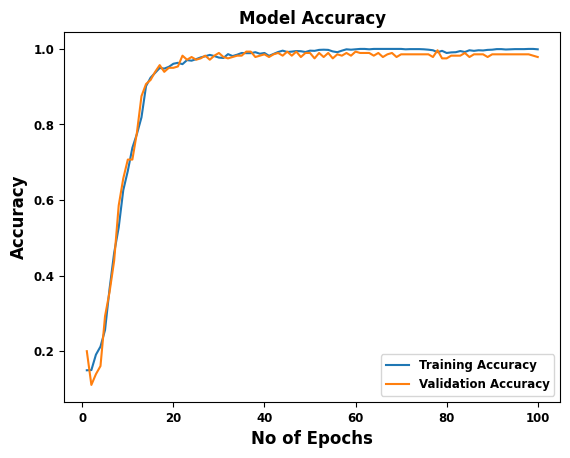

In [37]:
epochs = np.arange(1,101,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('DNN_BiLSTM_Model_Accuracy')
plt.show()

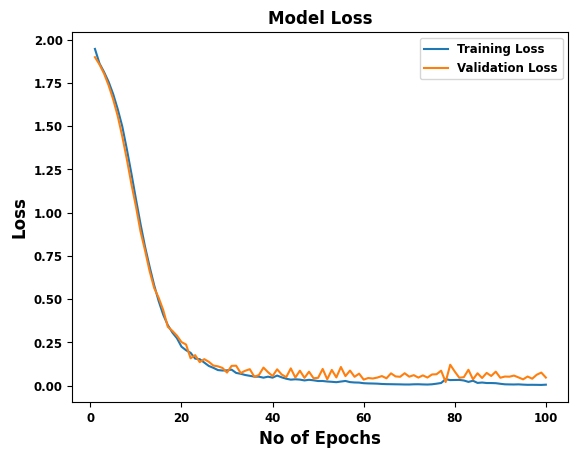

In [38]:
epochs = np.arange(1,101,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('DNN_BiLSTM_Model_Loss')
plt.show()

In [26]:
model.load_weights('best_model_mfcc_dnn_lstm.h5')

In [27]:
model.evaluate(X_Test,Y_Test)

18/18 [==============================] - 1s 6ms/step - loss: 0.7605 - accuracy: 0.8143


[0.760525643825531, 0.8142856955528259]

### Confusion Matrix  

In [28]:
predict_x = model.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 1s 6ms/step


In [29]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)  

[[80  0  1  4  0  2  0]
 [ 0 81  0  0  3  3  2]
 [ 2  0 73  0  0  0  0]
 [39  0  1 27  0 10  1]
 [ 0  0  0  0 67  0  0]
 [ 2  4  0 17  8 47  0]
 [ 0  2  0  2  0  1 81]]


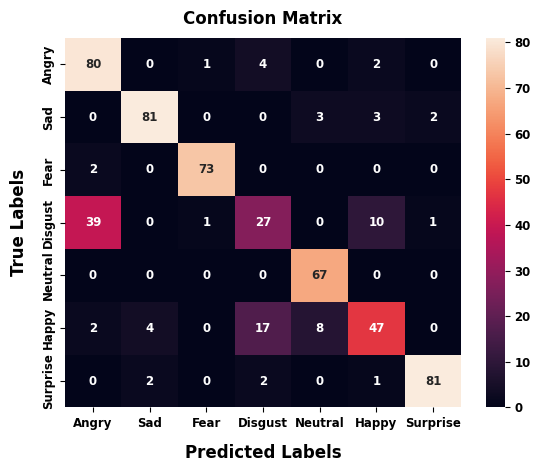

In [44]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('DNN_BiLSTM_Confusion_Matrix')

### Classification Report

In [30]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.65      0.92      0.76        87
           1       0.93      0.91      0.92        89
           2       0.97      0.97      0.97        75
           3       0.54      0.35      0.42        78
           4       0.86      1.00      0.92        67
           5       0.75      0.60      0.67        78
           6       0.96      0.94      0.95        86

    accuracy                           0.81       560
   macro avg       0.81      0.81      0.80       560
weighted avg       0.81      0.81      0.80       560



### Sensitivity and Specificity

In [31]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [32]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [33]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [34]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.91954023 0.91011236 0.97333333 0.34615385 1.         0.6025641
 0.94186047]
Specificity =  [0.90909091 0.98726115 0.99587629 0.95228216 0.97768763 0.96680498
 0.99367089]
accuracy for each class =  [0.91071429 0.975      0.99285714 0.86785714 0.98035714 0.91607143
 0.98571429]


### ROC Curve

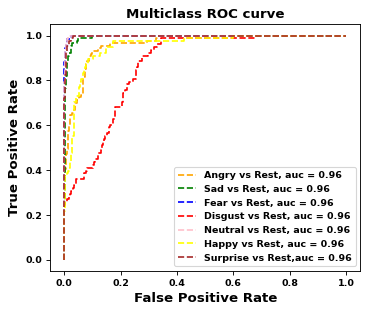

In [35]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
    
    
plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('DNN_BiLSTM_Multiclass_ROC',dpi=80);    

In [70]:
X = np.load('updated_mfcc_X.npy')
Y = np.load('updated_mfcc_Y.npy')

In [71]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,random_state=1,shuffle=True,test_size=0.2)

In [72]:
X_Train,X_Validation,Y_Train,Y_Validation = train_test_split(X_Train,Y_Train,random_state=2,shuffle=True,test_size=0.125)

In [73]:
print(X_Train.shape,Y_Train.shape)
print(X_Test.shape,Y_Test.shape)
print(X_Validation.shape,Y_Validation.shape)

(1960, 40, 130) (1960, 7)
(560, 40, 130) (560, 7)
(280, 40, 130) (280, 7)


## 1. Using CNN+LSTM

In [4]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',input_shape=(40,130,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=4,strides=4))
model.add(Reshape((-1,128)))
model.add(LSTM(32))
model.add(Dense(7,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
adam = Adam(lr=0.0003)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [34]:
best_model = ModelCheckpoint('./best_model_mfcc_cnn_lstm.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [43]:
X_Train = X_Train.reshape((-1,40,130,1))
X_Validation = X_Validation.reshape((-1,40,130,1))
X_Test = X_Test.reshape((-1,40,130,1))

In [ ]:
hist = model.fit(X_Train,Y_Train,shuffle=True,batch_size=16,epochs=100,validation_data=(X_Validation,Y_Validation),callbacks=[best_model])

In [ ]:
with open('saved_hist_chromagram_cnn_lstm.pkl','wb') as f:
    pickle.dump(hist.history,f)

In [7]:
with open('saved_hist_mfcc_cnn_lstm.pkl', 'rb') as f:
    history = pickle.load(f)

### Plot the results

In [8]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

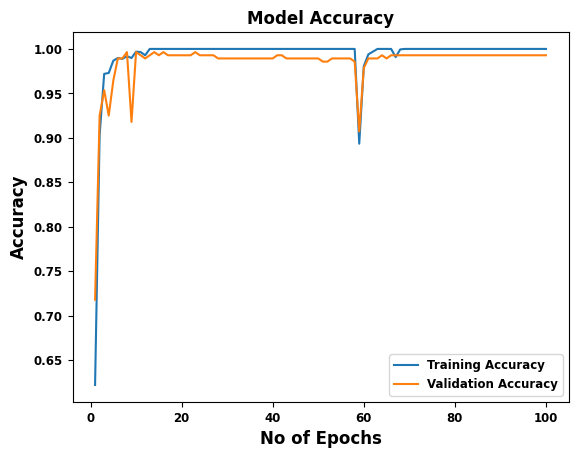

In [65]:
epochs = np.arange(1,101,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('model_accuracy.png')
plt.show()

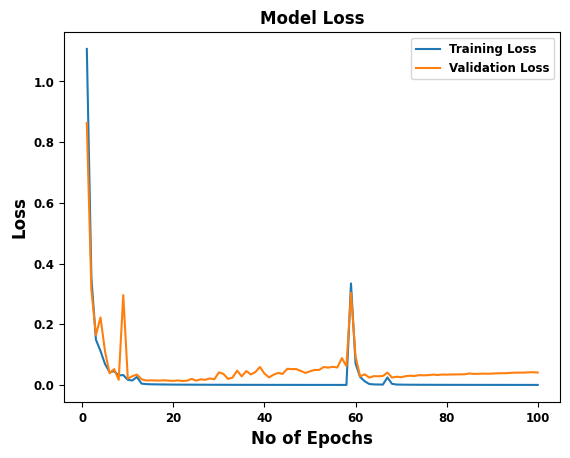

In [66]:
epochs = np.arange(1,101,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('model_loss.png')
plt.show()

### Side By Side Diagrams

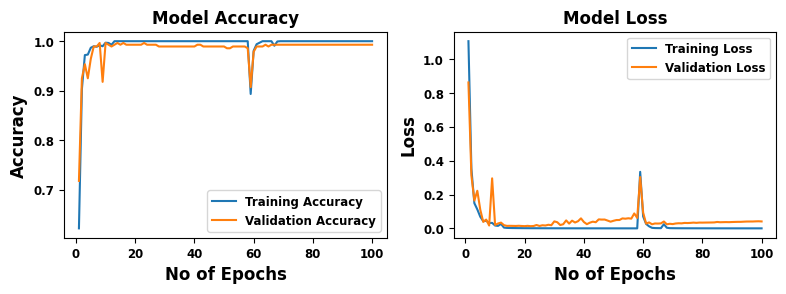

In [32]:
plt.subplots(1,2,figsize=(8,3))
epochs = np.arange(1,101,1)
plt.subplot(1, 2, 1) 
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')

plt.legend()
plt.tight_layout()
plt.savefig('cnn_lstm_model_accuracy_and_loss_diagram.png')
plt.show()

In [46]:
model.load_weights('best_model_mfcc_cnn_lstm.h5')

In [47]:
model.evaluate(X_Test,Y_Test)

18/18 [==============================] - 1s 31ms/step - loss: 0.0598 - accuracy: 0.9875


[0.05981610342860222, 0.987500011920929]

### Confusion Matrix

In [48]:
predict_x = model.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 1s 31ms/step


In [49]:
Y_actual = np.argmax(Y_Test,axis=1)

In [50]:
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[88  0  1  0  0  0  0]
 [ 0 75  0  0  0  0  0]
 [ 0  0 74  0  0  0  0]
 [ 1  0  1 78  0  3  0]
 [ 0  0  0  0 80  0  0]
 [ 0  0  0  1  0 82  0]
 [ 0  0  0  0  0  0 76]]


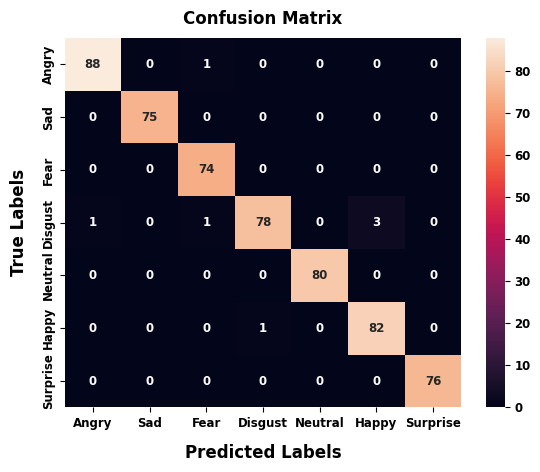

In [72]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('confusion_matrix.png')

### Classification Report

In [51]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        89
           1       1.00      1.00      1.00        75
           2       0.97      1.00      0.99        74
           3       0.99      0.94      0.96        83
           4       1.00      1.00      1.00        80
           5       0.96      0.99      0.98        83
           6       1.00      1.00      1.00        76

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560



### Sensitivity and Specificity

In [52]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [53]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [54]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [55]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.98876404 1.         1.         0.93975904 1.         0.98795181
 1.        ]
Specificity =  [0.99787686 1.         0.99588477 0.99790356 1.         0.99371069
 1.        ]
accuracy for each class =  [0.99642857 1.         0.99642857 0.98928571 1.         0.99285714
 1.        ]


### ROC Curve

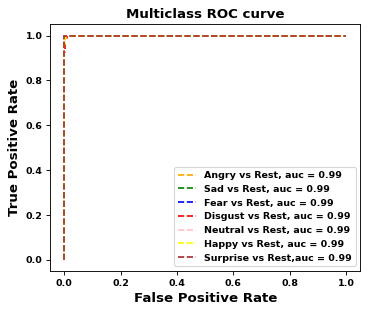

In [58]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
 
plt.figure(figsize=(5, 4),dpi=80)
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('CNN_LSTM_Multiclass_ROC.png',dpi=80);    

In [75]:
#Repeat the single channel 3 times to create 3 dimensions as Resnet accepts 3 dimensions. Final Output Size is (2800,12,130,3)
X_Train = np.repeat(X_Train[...,np.newaxis],3,-1) 
X_Test = np.repeat(X_Test[...,np.newaxis],3,-1) 
X_Validation = np.repeat(X_Validation[...,np.newaxis],3,-1) 

### Using VGG16

In [38]:
model = VGG16(weights='imagenet',include_top=False,input_shape=(40,130,3))

In [39]:
model.trainable = False

In [40]:
#Functional API
av1 = GlobalAveragePooling2D()(model.output)
dl1 = Dense(256,activation='relu')(av1)
dl2 = Dense(128,activation='relu')(dl1)
dl3 = Dense(7,activation='softmax')(dl2)

model_new = Model(inputs=model.input,outputs=dl3)

In [41]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [42]:
early_stop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
best_model = ModelCheckpoint('./best_model_mfcc_vgg16.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
hist = model_new.fit(X_Train,Y_Train,shuffle=True,batch_size=16,epochs=100,validation_data=(X_Validation,Y_Validation),callbacks=[early_stop,best_model])

In [43]:
with open('saved_hist_mfcc_vgg16.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [44]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

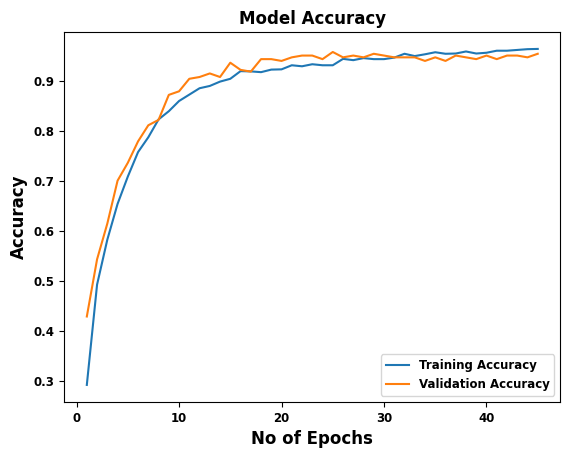

In [89]:
epochs = np.arange(1,46,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg16_model_accuracy')
plt.show()

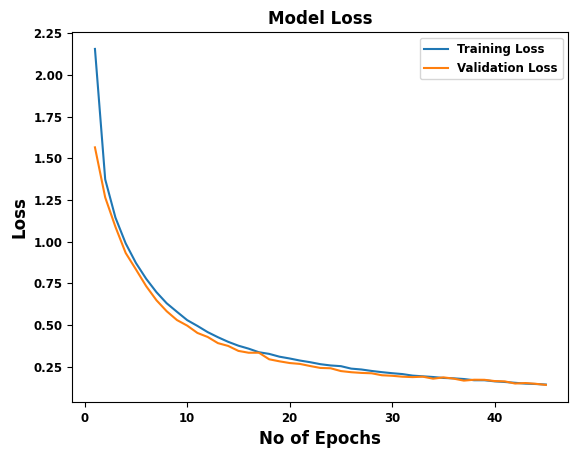

In [90]:
epochs = np.arange(1,46,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg16_model_loss')
plt.show()

In [83]:
model_new.load_weights('best_model_mfcc_vgg16.h5')

In [84]:
model_new.evaluate(X_Test,Y_Test)

18/18 [==============================] - 7s 387ms/step - loss: 0.2962 - accuracy: 0.9036


[0.2961641252040863, 0.9035714268684387]

### Confusion Matrix

In [85]:
predict_x = model_new.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 7s 404ms/step


In [86]:
Y_actual = np.argmax(Y_Test,axis=1)
Y_Pred
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[83  0  4  0  0  1  1]
 [ 0 71  0  0  0  2  2]
 [ 8  0 61  1  2  2  0]
 [ 1  0  1 80  0  1  0]
 [ 0  0  1  0 73  0  6]
 [ 0  9  1  9  0 64  0]
 [ 0  2  0  0  0  0 74]]


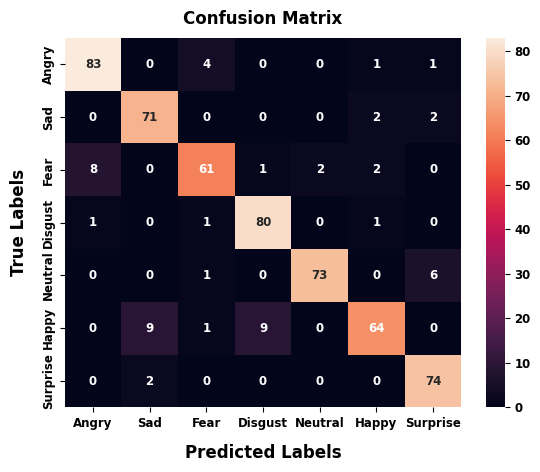

In [119]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('vgg16_confusion_matrix')

### Classification Report

In [87]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        89
           1       0.87      0.95      0.90        75
           2       0.90      0.82      0.86        74
           3       0.89      0.96      0.92        83
           4       0.97      0.91      0.94        80
           5       0.91      0.77      0.84        83
           6       0.89      0.97      0.93        76

    accuracy                           0.90       560
   macro avg       0.90      0.90      0.90       560
weighted avg       0.91      0.90      0.90       560



### Sensitivity and Specificity

In [88]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [89]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [90]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [91]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.93258427 0.94666667 0.82432432 0.96385542 0.9125     0.77108434
 0.97368421]
Specificity =  [0.98089172 0.97731959 0.98559671 0.97903564 0.99583333 0.98742138
 0.98140496]
accuracy for each class =  [0.97321429 0.97321429 0.96428571 0.97678571 0.98392857 0.95535714
 0.98035714]


### ROC Curve

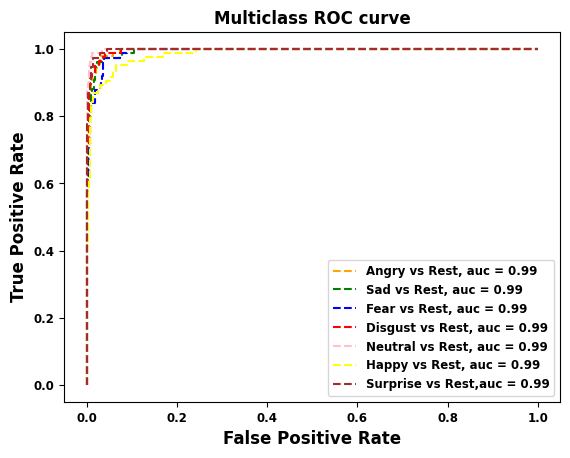

In [125]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('vgg_16_Multiclass_ROC',dpi=300);    

## Using VGG19

In [46]:
model = VGG19(weights='imagenet',include_top=False,input_shape=(40,130,3))

In [47]:
model.trainable = False

In [48]:
#Functional API
av1 = GlobalAveragePooling2D()(model.output)
dl1 = Dense(256,activation='relu')(av1)
dl2 = Dense(128,activation='relu')(dl1)
dl3 = Dense(7,activation='softmax')(dl2)

model_new = Model(inputs=model.input,outputs=dl3)

In [49]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [50]:
early_stop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
best_model = ModelCheckpoint('./best_model_mfcc_vgg19.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [ ]:
hist = model_new.fit(X_Train,Y_Train,shuffle=True,batch_size=16,epochs=100,validation_data=(X_Validation,Y_Validation),callbacks=[early_stop,best_model])

In [51]:
with open('saved_hist_mfcc_vgg19.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [52]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

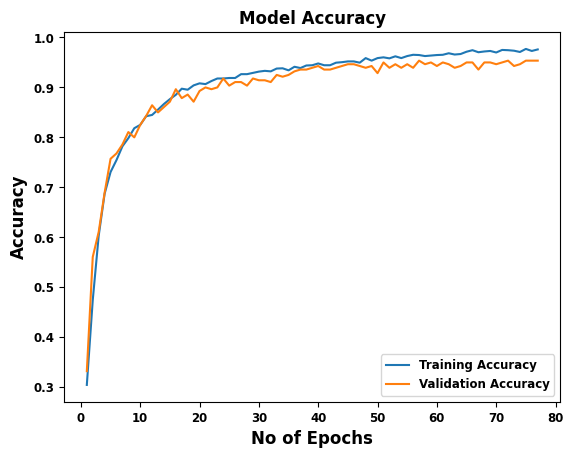

In [136]:
epochs = np.arange(1,78,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg19_model_accuracy')
plt.show()

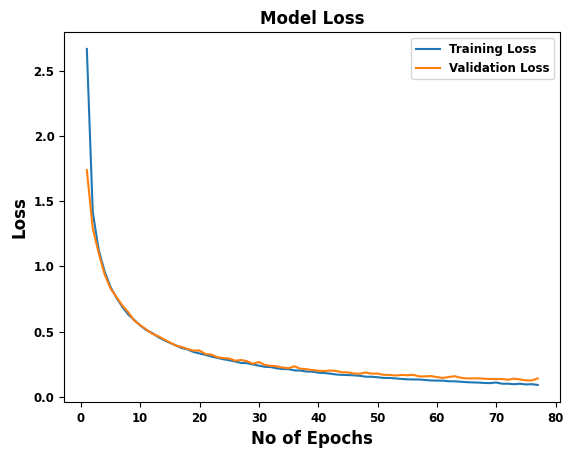

In [137]:
epochs = np.arange(1,78,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('vgg19_model_loss')
plt.show()

In [99]:
model_new.load_weights('best_model_mfcc_vgg19.h5')

In [100]:
model_new.evaluate(X_Test,Y_Test)

18/18 [==============================] - 9s 472ms/step - loss: 0.2105 - accuracy: 0.9286


[0.21054399013519287, 0.9285714030265808]

### Confusion Matrix

In [101]:
predict_x = model_new.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 9s 508ms/step


In [102]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[87  0  1  0  0  1  0]
 [ 0 71  0  0  1  2  1]
 [ 3  0 71  0  0  0  0]
 [ 0  0  1 72  0 10  0]
 [ 1  0  0  0 76  1  2]
 [ 0  6  0  6  0 70  1]
 [ 0  2  0  0  1  0 73]]


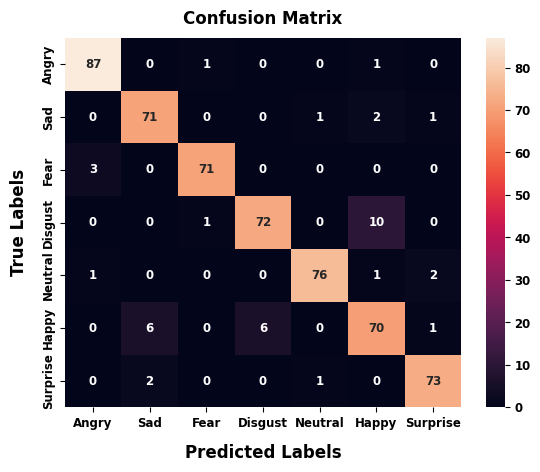

In [142]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('vgg19_confusion_matrix')

### Classification Report

In [103]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.90      0.95      0.92        75
           2       0.97      0.96      0.97        74
           3       0.92      0.87      0.89        83
           4       0.97      0.95      0.96        80
           5       0.83      0.84      0.84        83
           6       0.95      0.96      0.95        76

    accuracy                           0.93       560
   macro avg       0.93      0.93      0.93       560
weighted avg       0.93      0.93      0.93       560



### Sensitivity and Specificity

In [104]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [105]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [106]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [107]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.97752809 0.94666667 0.95945946 0.86746988 0.95       0.84337349
 0.96052632]
Specificity =  [0.99150743 0.98350515 0.99588477 0.98742138 0.99583333 0.9706499
 0.99173554]
accuracy for each class =  [0.98928571 0.97857143 0.99107143 0.96964286 0.98928571 0.95178571
 0.9875    ]


### ROC Curve

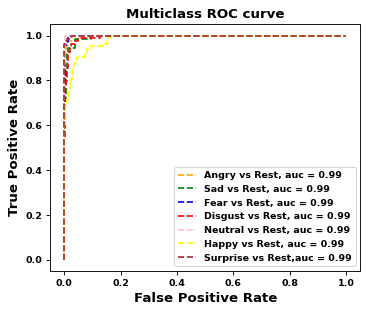

In [108]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
plt.figure(figsize=(5, 4),dpi=80)    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('vgg19_Multiclass_ROC',dpi=80);    

## Using Resnet50

In [2]:
model = ResNet50(include_top=False,weights='imagenet',input_shape=(40,130,3))

2022-12-20 05:28:34.562701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-20 05:28:34.576956: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-20 05:28:34.577057: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (anurag1905): /proc/driver/nvidia/version does not exist
2022-12-20 05:28:34.577709: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40, 130, 3)  0           []                               
                                ]                                                                 
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 46, 136, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 20, 65, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 20, 65, 64)   256         ['conv1_conv[0][0]']      

 conv2_block3_2_conv (Conv2D)   (None, 10, 33, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 10, 33, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 10, 33, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 10, 33, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 5, 17, 128)   147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 5, 17, 128)  512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 5, 17, 128)  0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 5, 17, 512)   66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 3, 9, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 3, 9, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 3, 9, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 3, 9, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 3, 9, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 3, 9, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 3, 9, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 3, 9, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 2, 5, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 2, 5, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 2, 5, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 2, 5, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [55]:
# Functional API
av1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(av1)
d1 = Dropout(0.5)(fc1)
fc2 = Dense(7,activation='softmax')(d1)

model_new = Model(inputs=model.input,outputs=fc2)

In [56]:
adam = Adam(lr=0.00003)
model_new.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [57]:
early_stop=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
best_model = ModelCheckpoint('./best_model_mfcc_resnet50.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [58]:
# Perform Fine Tuning -> Train only the few layers at the last
for ix in range(169):
    model_new.layers[ix].trainable = False

In [ ]:
hist = model_new.fit(X_Train,Y_Train,shuffle=True,batch_size=20,epochs=200,validation_data = (X_Validation,Y_Validation),callbacks=[early_stop,best_model])

In [59]:
with open('saved_hist_mfcc_resnet50.pkl','rb') as f:
    history = pickle.load(f)

## Plot the results

In [60]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

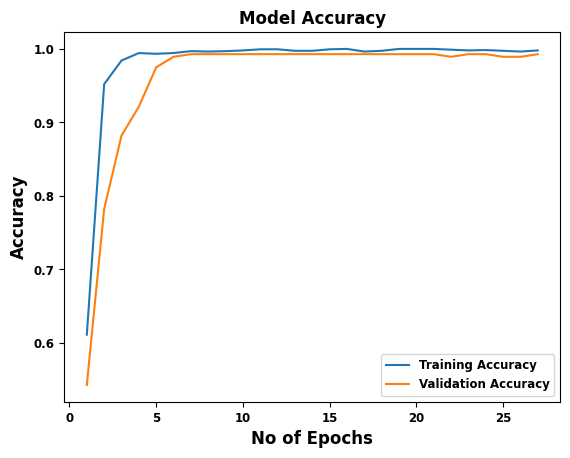

In [160]:
epochs = np.arange(1,28,1)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Accuracy",fontsize=12,fontweight='bold')
plt.title("Model Accuracy",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('resnet50_model_accuracy')
plt.show()

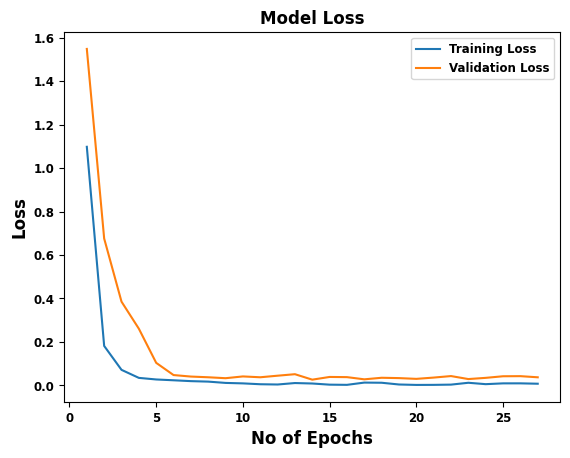

In [161]:
epochs = np.arange(1,28,1)
plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.xlabel("No of Epochs",fontsize=12,fontweight='bold')
plt.ylabel("Loss",fontsize=12,fontweight='bold')
plt.title("Model Loss",fontsize=12,fontweight='bold')
plt.legend()
plt.savefig('resnet50_model_loss')
plt.show()

In [115]:
model_new.load_weights('best_model_mfcc_resnet50.h5')

In [116]:
model_new.evaluate(X_Test,Y_Test)

18/18 [==============================] - 5s 208ms/step - loss: 0.0120 - accuracy: 0.9982


[0.012030916288495064, 0.9982143044471741]

### Confusion Matrix

In [117]:
predict_x = model_new.predict(X_Test)
Y_Pred = np.argmax(predict_x,axis=1)

18/18 [==============================] - 4s 206ms/step


In [118]:
Y_actual = np.argmax(Y_Test,axis=1)
cnf_matrix = confusion_matrix(Y_actual,Y_Pred)
print(cnf_matrix)

[[88  0  0  1  0  0  0]
 [ 0 75  0  0  0  0  0]
 [ 0  0 74  0  0  0  0]
 [ 0  0  0 83  0  0  0]
 [ 0  0  0  0 80  0  0]
 [ 0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0 76]]


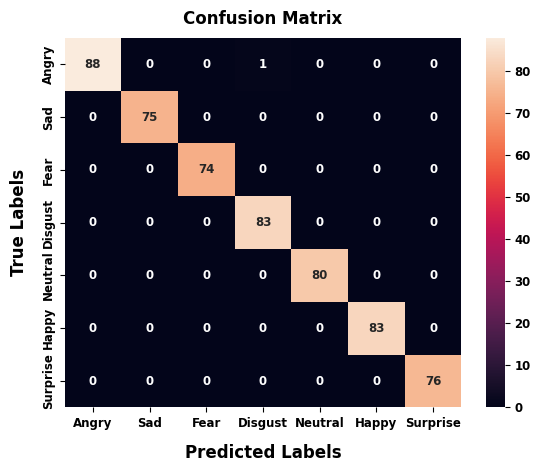

In [174]:
ax= plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted Labels',fontsize=12,fontweight='bold',labelpad=10);
ax.set_ylabel('True Labels',fontsize=12,fontweight='bold',labelpad=10); 
ax.set_title('Confusion Matrix',fontsize=12,fontweight='bold',pad=10); 
ax.xaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']); ax.yaxis.set_ticklabels(['Angry','Sad','Fear','Disgust','Neutral','Happy','Surprise']);
plt.savefig('resnet50_confusion_matrix')

### Classification Report

In [119]:
print(classification_report(Y_actual, Y_Pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        74
           3       0.99      1.00      0.99        83
           4       1.00      1.00      1.00        80
           5       1.00      1.00      1.00        83
           6       1.00      1.00      1.00        76

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



### Sensitivity and Specificity

In [120]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

In [121]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [122]:
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
ACC = (TP+TN)/(TP+FP+FN+TN)
FPR = FP/(FP+TN)

In [123]:
print("Sensitivity = ",TPR)
print("Specificity = ",TNR)
print("accuracy for each class = ",ACC)

Sensitivity =  [0.98876404 1.         1.         1.         1.         1.
 1.        ]
Specificity =  [1.         1.         1.         0.99790356 1.         1.
 1.        ]
accuracy for each class =  [0.99821429 1.         1.         0.99821429 1.         1.
 1.        ]


### ROC Curve

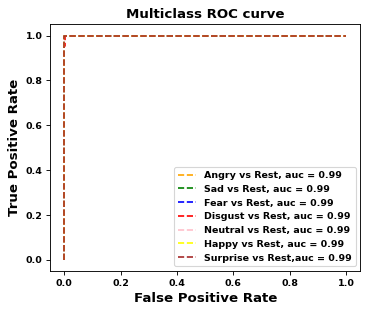

In [124]:
### ROC Curve
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
auc = {}
y_prob_pred_cnb = predict_x

n_class = 7
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(Y_actual, y_prob_pred_cnb[:,i], pos_label=i)
    auc[i] = metrics.roc_auc_score(Y_actual,y_prob_pred_cnb,multi_class='ovr',average='weighted')
plt.figure(figsize=(5, 4),dpi=80)    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Angry vs Rest, auc = '+str(auc[0])[:4])
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Sad vs Rest, auc = '+str(auc[1])[:4])
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Fear vs Rest, auc = '+str(auc[2])[:4])
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Disgust vs Rest, auc = '+str(auc[3])[:4])
plt.plot(fpr[4], tpr[4], linestyle='--',color='pink', label='Neutral vs Rest, auc = '+str(auc[4])[:4])
plt.plot(fpr[5], tpr[5], linestyle='--',color='yellow', label='Happy vs Rest, auc = '+str(auc[5])[:4])
plt.plot(fpr[6], tpr[6], linestyle='--',color='brown', label='Surprise vs Rest,auc = '+str(auc[6])[:4])
plt.title('Multiclass ROC curve',fontsize=12,fontweight='bold')
plt.xlabel('False Positive Rate',fontsize=12,fontweight='bold')
plt.ylabel('True Positive Rate',fontsize=12,fontweight='bold')
plt.legend(loc='best')
plt.savefig('resnet50_Multiclass_ROC',dpi=80);    